# Exploratory Analysis of Data Analyst Job Postings in the United States by Using `histogram`

In [3]:
# Importing Libraries
import ast
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

# Getting the data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst Data
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

c:\Users\Huawei\.cache\kagglehub\datasets\ankushpanday1\global-population-dataset-20142024\versions\1\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Simple Distribution of Data Analyst Salaries in the US

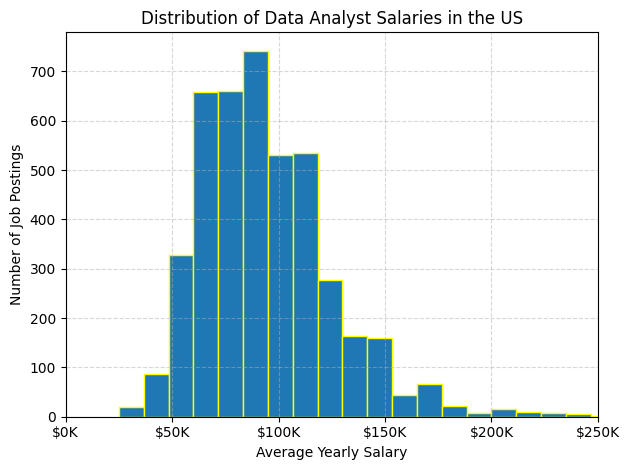

In [5]:
# Plot histogram
df_DA_US_cleaned = df_DA_US['salary_year_avg'].dropna()

df_DA_US_cleaned.plot(kind='hist', bins=30, edgecolor='yellow')
plt.xlim(0, 250000)

# Format x-axis ticks (e.g., $100K, $150K)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

# Add labels and title
plt.xlabel("Average Yearly Salary")
plt.ylabel("Number of Job Postings")
plt.title("Distribution of Data Analyst Salaries in the US")

# Improve layout
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()


## Here I used `seaborn` to Make Distribution Smoother

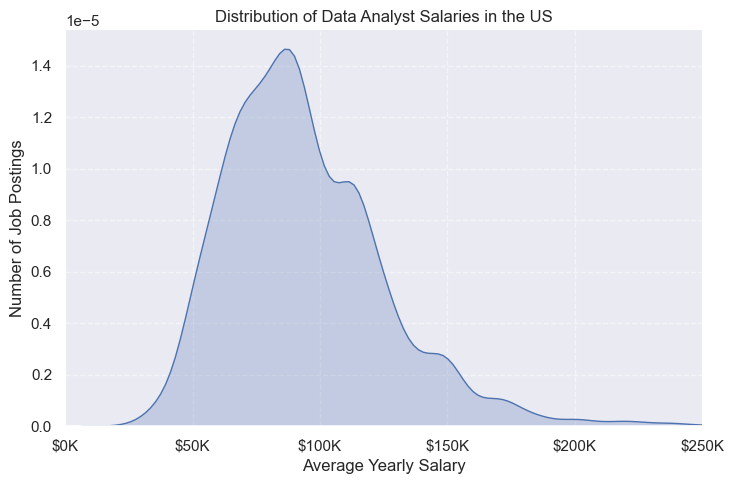

In [ ]:
import seaborn as sns

# Set theme
sns.set_theme(style='darkgrid')

# Create distribution plot and capture the FacetGrid
g = sns.displot(data=df_DA_US_cleaned, kind='kde', fill=True, height=5, aspect=1.5)

# Access the Axes object
ax = g.ax

# Set axis limits
ax.set_xlim(0, 250000)


# Format x-axis ticks
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

# Set labels and title
ax.set_xlabel("Average Yearly Salary")
ax.set_ylabel("Number of Job Postings")
ax.set_title("Distribution of Data Analyst Salaries in the US")

# Add grid customization
ax.grid(True, linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
